# Part 1: Introducing MNIST

In [1]:
# Execute this code block to install dependencies when running on colab
try:
    import torch
except:
    from os.path import exists
    from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
    platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
    cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
    accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

    !pip install -q http://download.pytorch.org/whl/{accelerator}/torch-1.0.0-{platform}-linux_x86_64.whl torchvision

try: 
    import torchbearer
except:
    !pip install torchbearer

     |████████████████████████████████| 138 kB 8.1 MB/s 


## The MNIST Dataset

MNIST is a dataset developed by Yann LeCun, Corinna Cortes and Christopher Burges for evaluating machine learning models on the handwritten digit classification problem.

The dataset was constructed from a number of scanned document dataset available from the National Institute of Standards and Technology (NIST). This is where the name for the dataset comes from, as the Modified NIST or MNIST dataset.

Images of digits were taken from a variety of scanned documents, normalized in size and centred. This makes it an excellent dataset for evaluating models, allowing the developer to focus on the machine learning with very little data cleaning or preparation required.

Each image is a 28 by 28 pixel square (784 pixels total). A standard spit of the dataset is used to evaluate and compare models, where 60,000 images are used to train a model and a separate set of 10,000 images are used to test it.

It is a digit recognition task. As such there are 10 digits (0 to 9) or 10 classes to predict. Results are reported using prediction error, which is nothing more than the inverted classification accuracy.

Excellent results achieve a prediction error of less than 1%. State-of-the-art prediction error of approximately 0.2% can be achieved with large Convolutional Neural Networks. There is a listing of the state-of-the-art results and links to the relevant papers on the MNIST and other datasets on [Rodrigo Benenson’s webpage](http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html#4d4e495354).

## Loading the MNIST dataset in PyTorch and torchvision

The `torchvision` library provides a convenience method for loading the MNIST dataset. The dataset can be downloaded automatically the first time this function is called and is stored in a location of your choice. This is very handy for developing and testing deep learning models.

To demonstrate how easy it is to load the MNIST dataset, we will first write a little script to download and visualize the first 4 images in the training dataset. __Read through the following code and then go-ahead and run it__.

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:62: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


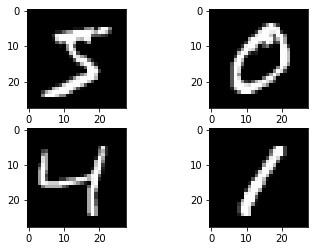

In [2]:
%matplotlib inline

# Plot ad hoc mnist instances
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt

# load (download if needed) the MNIST dataset
mnist_train = MNIST(".", train=True, download=True)

# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(mnist_train.train_data[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(mnist_train.train_data[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(mnist_train.train_data[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(mnist_train.train_data[3], cmap=plt.get_cmap('gray'))

# show the plot
plt.show()

You can see that downloading and loading the MNIST dataset is as easy as constructing an `MNIST` object. The `MNIST` object is a subclass of a PyTorch [`torch.utils.data.Dataset`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset) class, which as we'll see later can be used with a `DataLoader` object to provide streaming access to batches of data. The `MNIST` object loads all of the data in memory because it is so small; other datasets will load the data from disk (or elsewhere) on demand.

__Use the following code block to explore the `mnist_train` object, then answer the questions that follow.__

In [5]:
type(mnist_train.train_data)
print("Shape of this object is : ", mnist_train.train_data.shape)
print(mnist_train.train_labels)

Shape of this object is :  torch.Size([60000, 28, 28])
tensor([5, 0, 4,  ..., 5, 6, 8])


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:62: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:52: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


__Answer the following questions (enter the answer in the box below each one):__

__1.__ What type of object is the `mnist_train.train_data`?


It is of type torch.tensor. The data is a bunch of tensors. The above images are plotted using matplotlib that's why they look like handwritten images otherwise they are a bunch of tensors held by the train_data member in the mnist_train object.

__2.__ What is the shape of `mnist_train.train_data`?`

60000,28,28
Basically 60000 images, each of 28x28 pixels

__3.__ How is the label of each image stored in `mnist_train`?

The label of each image is stored as a tensor containing class labels as either 0,5,4 etc in the train_labels attribute of the mnist_data class
